In [1]:
import time
import warnings
from itertools import cycle, islice
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
centers = [[1,1],[-1,-1],[1,-1]]
df = pd.read_csv('./Datasets/2015.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [6]:
X = df[['Economy (GDP per Capita)', 'Family', 'Happiness Score', 'Standard Error', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

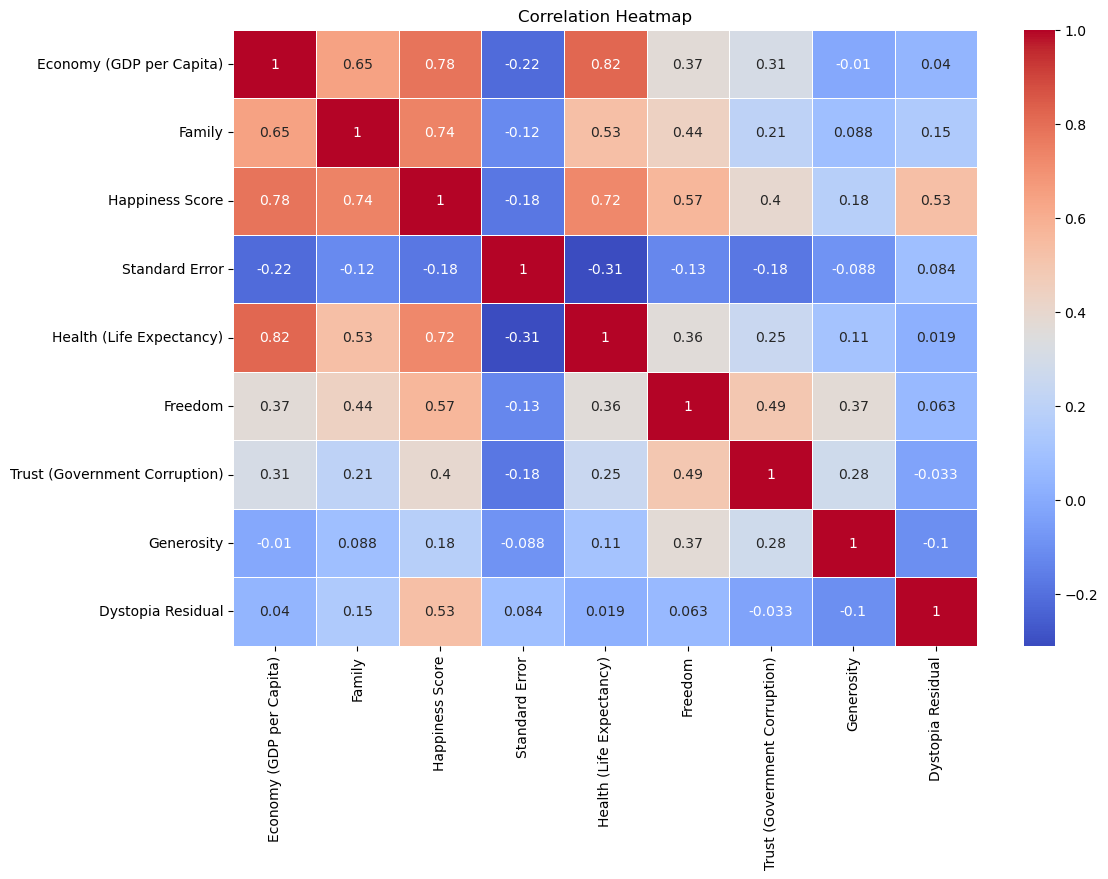

In [7]:
import seaborn as sns
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Calculate the covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top k eigenvectors (let's choose k=2 for this example)
k = 2
principal_components = eigenvectors[:, :k]

# Transform the data
X_pca = X_std.dot(principal_components)

# Create a DataFrame with the transformed data
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(df_pca.head())

        PC1       PC2
0 -4.017264  0.589223
1 -3.337489 -0.179703
2 -3.970239  1.070468
3 -3.820490  0.637453
4 -3.639222  1.059265


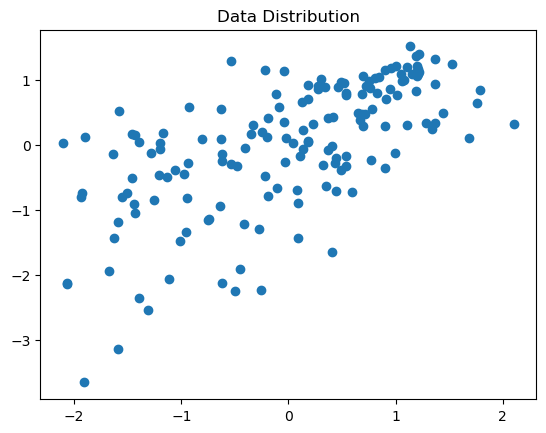

In [9]:
dataset1 = StandardScaler().fit_transform(X)
plt.scatter(dataset1[:,0],dataset1[:,1],)
plt.title("Data Distribution")
plt.show()

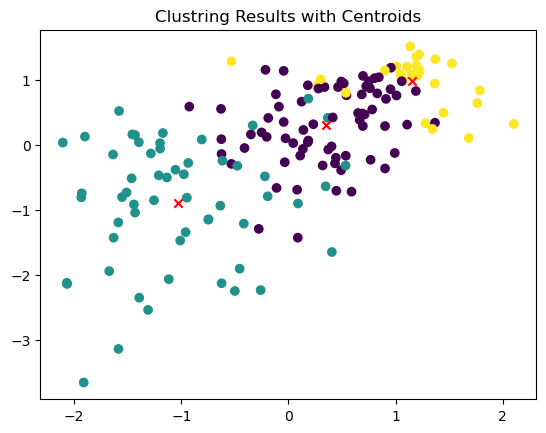

In [10]:
kmeans1 = KMeans(n_clusters=3,random_state=42)
kmeans1.fit(dataset1)

centers = kmeans1.cluster_centers_
labels = kmeans1.labels_
plt.scatter(dataset1[:,0],dataset1[:,1],c=labels,cmap='viridis',marker='o')
plt.scatter(centers[:,0],centers[:,1],c='r',marker='x')
plt.title("Clustring Results with Centroids")
plt.show()

In [11]:
sscore = metrics.silhouette_score(dataset1,labels)
print(f"Silhoute Coefficirnt = {sscore:.3f}")

Silhoute Coefficirnt = 0.217


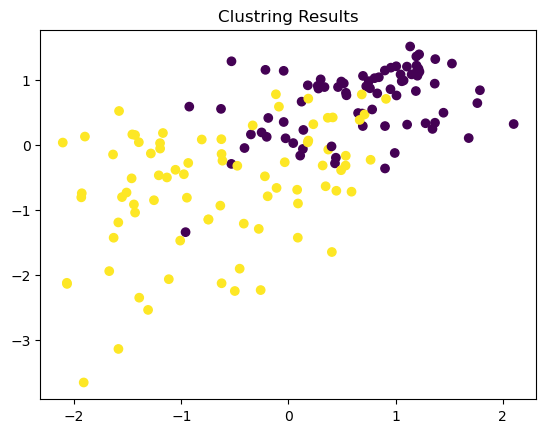

In [12]:
agg1 = AgglomerativeClustering(linkage='ward')
agg1.fit(dataset1)

labels = agg1.labels_
n_cluster = agg1.n_clusters_

plt.scatter(dataset1[:,0],dataset1[:,1],c=labels,cmap='viridis',marker='o')
plt.title("Clustring Results")
plt.show()

In [13]:
sscore = metrics.silhouette_score(dataset1,labels)
print(f"Silhoute Coefficirnt = {sscore:.3f}")

Silhoute Coefficirnt = 0.239


In [14]:
from sklearn.neighbors import NearestNeighbors

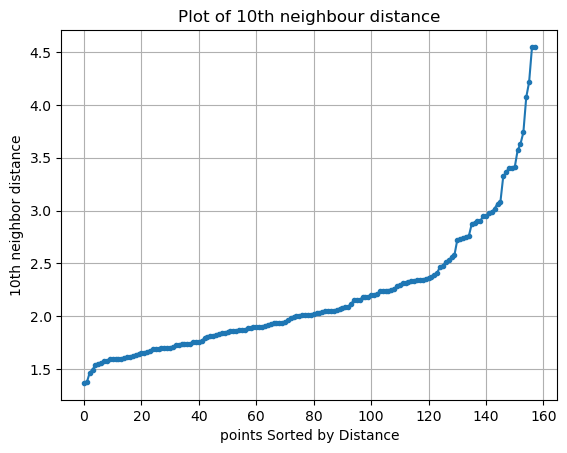

In [15]:
k = 10 #set the value of k (Minpts in DBSCAN)
nn_model = NearestNeighbors(n_neighbors=k)
nn_model.fit(dataset1)

distance, indices = nn_model.kneighbors(dataset1)

k_distance = distance[:,-1]
k_distance_sorted = np.sort(k_distance)

plt.plot(np.arange(len(k_distance_sorted)),k_distance_sorted,marker ='.')
plt.xlabel("points Sorted by Distance")
plt.ylabel(f"{k}th neighbor distance")
plt.title(f"Plot of {k}th neighbour distance")
plt.grid(True)

Estimated number of cluster = 1
Estimated number of noise_points = 13


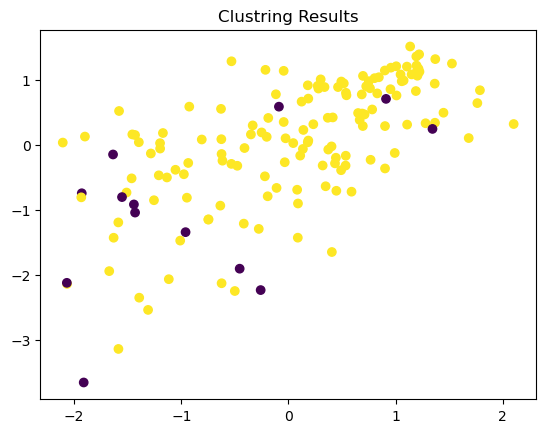

Silhoute Coefficirnt = 0.256


In [17]:
dbscan1 = DBSCAN(eps=2.5,min_samples=10)
dbscan1.fit(dataset1)

labels = dbscan1.labels_

n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# alternate_n = len(set(labels))-n_noise_

print(f"Estimated number of cluster = {n_clusters_}")
print(f"Estimated number of noise_points = {n_noise_}")
# print(alternate_n)
plt.scatter(dataset1[:,0],dataset1[:,1],c=labels,cmap='viridis',marker='o')
plt.title("Clustring Results")
plt.show()
sscore = metrics.silhouette_score(dataset1,labels)
print(f"Silhoute Coefficirnt = {sscore:.3f}")